# Rfam data set figure

In [139]:
import RNA
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'serif', 'serif':['Computer Modern Roman, Times']})
import glob 
all_files = glob.glob('/Users/harrisonlabollita/Library/Mobile Documents/com~apple~CloudDocs/Arizona State University/Sulc group/data_set/bad_seq/*')

In [140]:
def readFile(file):
    f = open(file, 'r')
    for i, line in enumerate(f):
        if i == 1:
            seq = line.rstrip()
        if i == 2:
            dots = line.split(' ')[1].rstrip()
            #dots.rstrip()
        if i == 3:
            pred = line.split(' ')[1]
            pred.rstrip()
    return seq, dots, pred

In [141]:
sequences = []
dotbrackets = []
seqlength= []
predictions = []
for file in all_files:
    seq, dots, pred = readFile(file)
    sequences.append(seq)
    seqlength.append(len(seq))
    dotbrackets.append(dots)
    predictions.append(pred)

In [142]:
print('Mean:',np.mean(seqlength))
print('Max:', np.max(seqlength))
print('Min:', np.min(seqlength))

Mean: 266.1509433962264
Max: 408
Min: 88


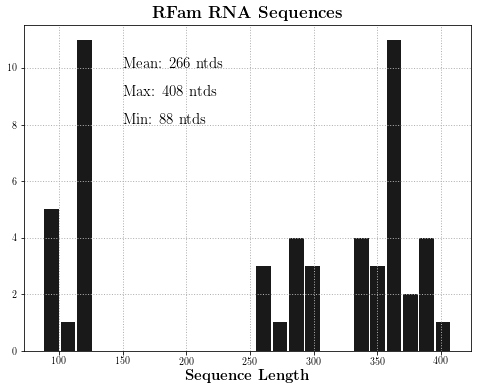

In [143]:
plt.figure(figsize = (8,6))
plt.title(r'{\bf RFam RNA Sequences}', fontsize = 17)
plt.grid(True, linestyle = ':', linewidth = 1)
plt.hist(seqlength, bins = 25, histtype = 'bar', rwidth = 0.9, color = 'black', alpha = 0.9, linewidth = 2)
plt.xlabel(r'{\bf Sequence Length}', fontsize = 15)
plt.text(150, 10, r'Mean: %d ntds' %(266), fontsize = 15)
plt.text(150, 9, r'Max: %d ntds' %(408), fontsize = 15)
plt.text(150, 8, r'Min: %d ntds' %(88), fontsize = 15)
#plt.savefig('rfam.eps', format = 'eps')
plt.show()

# Vienna RNA Performance Figure

In [91]:
def compare(prediction, target):
    if prediction == target:
        return True
    else:
        return False
    
incorrect = [] # Array to track how many mistakes Vienna RNA made for each sequence, the length will give us the total number of incorrect.
correct = 0 # counter for the number of sequences Vienna RNA correctly predicts

for i in range(len(dotbrackets)):
    # Loop throught all of the source dot-bracket representations
    mistake = 0 # counter for the number of mistakes that Vienna RNA made
    for j in range(len(dotbrackets[i])):
        # Run through each sequence of dot-brackets
    
        if compare(dotbrackets[i][j], predictions[i][j]):
            mistake +=0
        else:
            mistake += 1
    if mistake == 0:
        # if the mistake counter is still 0, then Vienna RNA correctly predcited the base pairs
        correct += 1
    else:
        mistake /= len(dotbrackets[i])
        incorrect.append(mistake)

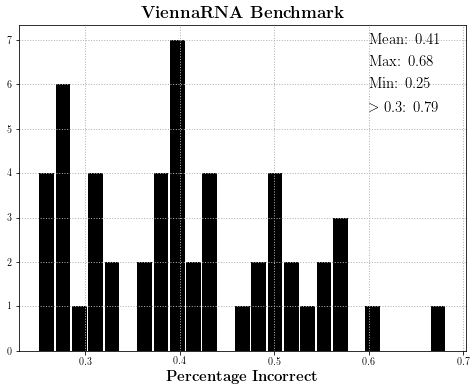

In [138]:
plt.figure(figsize = (8,6))
plt.grid(True, linestyle = ':', linewidth = 1)
plt.hist(incorrect, bins = 25, histtype = 'bar', rwidth = 0.9, color = 'black',linewidth = 2)
plt.text(0.6, 6.9, r'Mean: %0.2f ' %(0.407), fontsize = 15)
plt.text(0.6, 6.4, r'Max: %0.2f ' %(0.682), fontsize = 15)
plt.text(0.6, 5.9, r'Min: %0.2f ' %(0.25), fontsize = 15)
plt.text(0.6, 5.4, r'$>$ 0.3: %0.2f ' %(0.79), fontsize = 15)
plt.title(r'{\bf ViennaRNA Benchmark}', fontsize = 17)
plt.xlabel(r'{\bf Percentage Incorrect}', fontsize = 15)
plt.sa
plt.show()

In [107]:
print(np.mean(incorrect))
print(np.min(incorrect))
print(np.max(incorrect))

0.4071747060406842
0.2508361204013378
0.6818181818181818


In [111]:
print(len([x for x in incorrect if x>0.3]))

42


In [112]:
42/len(sequences)

0.7924528301886793